### <p style="text-align: right;"> &#9989; Andrew Koren</p>

# PHY480 Day 14

## In-class assignment: Root finding and optimization revisited

In this in-class assignment we generalize the root finding and optimization methods for multivariate case. This requires linear algebra operations.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import *


## Newton-Raphson root finding

**Task 1.** Consider the following system of equations:

$$
x^2+y^2=1,
$$

$$
y=x^2.
$$

Rewrite the system in the form 

$$
\vec{f}(\vec{r})=0,
$$

where $\vec{r}=(x,y)$. Write two functions that return $\vec{f}$ and the matrix $\vec{\nabla}\vec{f}$ (which is defined as transposed Jacobian).

Also, find the exact (real) solution of the system for comparison.


In [5]:
# YOUR CODE HERE
def f(r):
    x, y = r
    return np.array([x**2 + y**2 - 1, y - x**2])

def grad_f(r):
    x, y = r
    return np.array([[2*x, -2*x], [2*y, 1]])

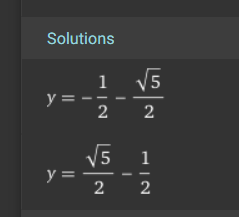

**Task 2.** Program a multi-dimensional Newton-Raphson root finding method. This is a simple extension of the one-dimensional method that we considered earlier. Use your own or NumPy functions for the Jacobian inversion.


In [17]:
# Newton-Raphson root finding method
# Input:
# fun -- vector function f(x) of a vector argument x, x and f have the same dimension
# dfun -- (transposed) jacobian df/dx
# x0 -- starting point (as NumPy vector of proper dimension)
# tol -- tolerance, the search stops once ||f(x)|| is less than the tolerance
# max_iter -- maximum number of iterations
# Output:
# status -- =0, if the search was successful, =1, if maximum number of iterations was exhausted
# x -- the solution (last iterate)
# k -- number of iterations it took
# xlist -- the list of all iterates
def root_newton_raphson(fun, dfun, x, tol=1e-4, max_iter=100):
    xlist = [x.copy()]
    
    for k in range(max_iter):
        f_val = fun(x)  # Evaluate function
        norm_f = np.linalg.norm(f_val)  # Compute norm
        
        if norm_f < tol:
            return 0, x, k, xlist  # Convergence achieved

        J = dfun(x)  # Evaluate Jacobian
        dx = np.linalg.solve(J, -f_val)  # Solve J dx = -f for dx
        
        x += dx  # Update solution
        xlist.append(x.copy())  # Store iterate

    return 1, x, max_iter, xlist  # Maximum iterations reached


**Task 3.** Solve the two-by-two nonlinear system you programmed in the previous exercise with the Newton-Raphson method. Use several starting points to see how the root finding method performs: $(0,0)$, $(0,1)$, $(0.1,0.1)$. Experiment with the tolerance. Compare with the exact solution.


In [18]:
# YOUR CODE HERE
root_newton_raphson(f, grad_f, np.array((0.1,0.1)), tol=1e-3, max_iter=int(1e5))

C:\Users\andre\AppData\Local\Temp\ipykernel_14844\1445041167.py:4: RuntimeWarning: overflow encountered in scalar power
  return np.array([x**2 + y**2 - 1, y - x**2])


(1,
 array([nan, nan]),
 100000,
 [array([0.1, 0.1]),
  array([ 4.10833333, -0.79166667]),
  array([-22.73966169, -25.63092268]),
  array([-34.05074416, -62.73474619]),
  array([ -44.4708842 , -147.95650489]),
  array([ -52.5884271 , -424.42700846]),
  array([  -58.40189525, -2169.24312663]),
  array([   -68.98307356, -42495.51529154]),
  array([-2.23548326e+02, -1.31319014e+07]),
  array([-1.49098032e+04, -3.85716852e+11]),
  array([-6.48241439e+06, -4.98925102e+18]),
  array([-1.92421326e+11, -1.92001191e+30]),
  array([-2.49454166e+18, -9.57909868e+48]),
  array([-9.60005883e+29, -1.83919822e+79]),
  array([-4.78954934e+048, -1.76178612e+128]),
  array([-9.19599109e+078, -3.24027389e+207]),
  array([-inf, -inf]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
  array([nan, nan]),
 

## Newton-Raphson optimization

**Task 4.** Program the Newton-Raphson method as an optimization method. In its basic form it requires the gradient and the Hessian for a (scalar) function $f(\vec{x})$, but not the function itself. However, modifications of this method may also require the function, so it is a good idea to program the method that receives in the arguments the function, its gradient and the Hessian. Use the `is_verbose` flag to print the norm of the gradient on every tenth iteration, if `True`.


In [ ]:
# Newton-Raphson optimization method
# Input:
# fun -- scalar function f(x) of a vector argument x
# dfun -- the gradient of f
# ddfun -- the Hessian of f
# x0 -- starting point (as NumPy vector of proper dimension)
# tol -- tolerance, the search stops once ||grad f(x)|| is less than the tolerance
# max_iter -- maximum number of iterations
# is_verbose -- print ||grad f(x)|| on every tenth iteration if True
# Output:
# status -- =0, if the search was successful, =1, if maximum number of iterations was exhausted
# x -- the solution (last iterate)
# k -- number of iterations it took
# xlist -- the list of all iterates
def optimize_newton_raphson( fun, dfun, ddfun, x0, tol=1e-5, max_iter=100, is_verbose=False ):

    return # something


**Task 5.** Consider the following four test functions. Code their gradients and Hessians.


In [ ]:
# multivariate function 1
def multifun1( x_vec ):

    # unpack the argument
    x = x_vec[0]
    y = x_vec[1]

    return ( 4*x - 4 )**2 + ( y - 2 )**2

# multivariate function 2
def multifun2( x_vec ):

    # unpack the argument
    x = x_vec[0]
    y = x_vec[1]

    return ( 4*x - 4*y - 1 )**2 + ( x + y - 2 )**2

# multivariate function 3
def multifun3( x_vec, a=1, b=10 ):

    # unpack the argument
    x = x_vec[0]
    y = x_vec[1]

    return ( a - x )**2 + b*( y - x**2 )**2

# multivariate function 4
def multifun4( x_vec, a=1.5 ):

    # unpack the argument
    x = x_vec[0]
    y = x_vec[1]

    return -np.exp( -( x*y - a )**2 - ( y - a )**2 )


**Task 6.** Find the minimum with the Newton-Raphson method and plot contours (check the documentation for the `contour` function in `matplotlib.pyplot`) for the functions given above and the path that the optimizer takes. In some cases, the method may not converge to a local minimum. For convenience, use the parameters preset below. Here `xtrue` is the location of the minimum for comparison, and `ax,bx`, `ay,by` provide the intervals for plotting on $x$ and $y$, correspondingly. `x0_list` is the list of starting points for each test function.

For the second test function the plot may looks something like this:

![minimization](nr_case2.png)


In [ ]:
# set to 1, 2, 3 or 4 to run optimization and plot
icase = 1

if icase == 1:
    xtrue = np.array( [1,2] )
    x0_list = [ np.array( [ 10, 10 ] ), np.array( [ 3, 10 ] ), np.array( [ 10, 0 ] ), \
                np.array( [ 2, 7 ] ), np.array( [ 0, 5 ] ) ]
    ax, bx = -2, 12
    ay, by = -2, 12
elif icase == 2:
    xtrue = np.array( [1.125, 0.875] )
    x0_list = [ np.array( [ 10, 10 ] ), np.array( [ 3, 10 ] ), np.array( [ 10, 0 ] ), \
                np.array( [ 2, 7 ] ), np.array( [ 0, 5 ] ) ]
    ax, bx = -2, 12
    ay, by = -2, 12
elif icase == 3:
    xtrue = np.array( [1.0, 1.0] )
    x0_list = [ np.array( [ 0, 2 ] ), np.array( [ 1, 0 ] ), np.array( [ 1, -1 ] ), \
                np.array( [ -0.5, 2 ] ), np.array( [ -2, -1 ] ) ]
    ax, bx = -2, 2
    ay, by = -1, 3
elif icase == 4:
    xtrue = np.array( [1.0, 1.5] )
    x0_list = [ np.array( [0,1.8] ), np.array( [2,2] ), np.array( [0.5,2.5] ), np.array( [1.2,1.5] ), \
                np.array( [1.5,1.] ) ]
    ax, bx = 0, 3
    ay, by = 0, 3


In [ ]:
# YOUR CODE HERE


## Gradient descent

**Task 7.** Code a multivariate gradient descent optimization algorithm. Use `scipy.optimize.line_search` to find the step size (study the documentation on how to properly provide the arguments and read the step size from the returned value). Make sure to check for line search failure and return proper status.


In [ ]:
# gradient descent optimization, requires objective function and its gradient as arguments
# Input:
# fun -- objective function, callable
# dfun -- gradient of the objective function, callable
# x0 -- starting point vector
# tol -- tolerance, the search stops once ||grad f(x)|| is less than the tolerance
# Output: comma-separated list
# status -- =0, if successful, =1, if maximum number of iterations reached, =2, if line search did not converge
# minimum that was found
# number of iterations
# list of all iterates
def optimize_grad_descent( fun, dfun, x0, tol=1e-4, max_iter=100 ):
    
    return # something


**Task 8.** Find the minimum for the four test functions given above and plot what path the gradient descent method took together with the function contours.

For the second test function the plot may looks something like this:

![minimization](gd_case2.png)


&#169; Copyright 2025,  Michigan State University Board of Trustees